In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk as nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/adm2/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/adm2/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/adm2/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/adm2/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/adm2/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /Users/adm2/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nl

True

In [4]:
# Reading in the dataset

df = pd.read_csv("Reviews.csv")
df.shape

(568454, 10)

In [5]:
# OPTIONAL: limiting the dataset to the first 500 rows for ease of handling
df = df.head(500)
df.shape

(500, 10)

### NLTK modules and methods

In [10]:
# Taking a random exampel text from the dataset

example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [17]:
tokens = nltk.word_tokenize(example)      # identifies each bit of language (can be smaller than word)
tagged = nltk.pos_tag(tokens)                   # to identify the parts of speech of each token


In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()                                  # creating the Sentiment Intensity Analyzer Object

In [49]:
results = {}
for i, row in df.iterrows():
        results[row.Id] = sia.polarity_scores(row.Text)         # applies the Sentiment Analyzer to each dataframe rows' text

In [88]:
vaders_res = pd.DataFrame(results).T                            # creates our results dataframe
vaders_res.insert(0, 'Id', df.index+1)                                # creates the index column to merge the dataframe
vaders_res = vaders_res.merge(df, how = 'left')              # merges the dataframe to make the results dataframe


In [94]:
vaders_res.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


/var/folders/1n/tpyl9_bx5rld2prfjgfsxcpm0000gr/T/ipykernel_94927/751070288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders_res, x="Score", y="compound", palette=['#1ce3fe', '#00c9f8', '#00aeef', '#0092e2', '#0076cf'],)


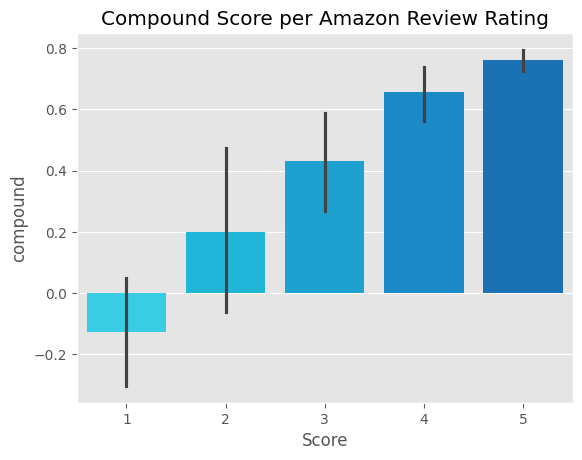

In [102]:
ax = sns.barplot(data=vaders_res, x="Score", y="compound", palette=['#1ce3fe', '#00c9f8', '#00aeef', '#0092e2', '#0076cf'],)
ax.set_title("Compound Score per Amazon Review Rating")
plt.show()

### Roberta Pretrained Model

In [104]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax

/Users/adm2/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [105]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json: 100%|██████████| 747/747 [00:00<00:00, 5.46MB/s]
vocab.json: 100%|██████████| 899k/899k [00:00<00:00, 5.60MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 1.87MB/s]
special_tokens_map.json: 100%|██████████| 150/150 [00:00<00:00, 610kB/s]
pytorch_model.bin: 100%|██████████| 499M/499M [10:09<00:00, 818kB/s] 


##### Running the Roberta model on one sample text

In [107]:
# Encode the text
encoded_text = tokenizer(example, return_tensors = 'pt')

In [108]:
# Running the pretrained model on the encoded text
output = model(**encoded_text) 
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687457, 'roberta_pos': 0.0029573694}


In [134]:
def evaluate_score_roberta(word) -> dict:
        encoded_text = tokenizer(word, return_tensors = 'pt')
        output = model(**encoded_text) 
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        scores_dict = {
                'roberta_neg' : scores[0],
                'roberta_neu' : scores[1],
                'roberta_pos' : scores[2]
        }

        return(scores_dict)

In [136]:
res = {}
for i, row in df.iterrows():
        try:
                text = row['Text']
                myid = row['Id']

                sia_result = sia.polarity_scores (text)

                sia_result_rename = {}
                for key, value in sia_result.items():
                        sia_result_rename[f"sia_{key}"] = value                         #edits the key names in the sia results to specify that they're sia results

                roberta_result = evaluate_score_roberta(text)
                if (i%50 == 0):
                        print(roberta_result)
                        
                both = {**sia_result_rename, **roberta_result}
                res[myid] = both
        except RuntimeError:
                print(f'index {myid} threw a RuntimeError, skipping over this example')

{'roberta_neg': 0.009624226, 'roberta_neu': 0.049980376, 'roberta_pos': 0.94039536}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687457, 'roberta_pos': 0.0029573694}
index 83 threw a RuntimeError, skipping over this example
{'roberta_neg': 0.30692154, 'roberta_neu': 0.45656905, 'roberta_pos': 0.23650941}
{'roberta_neg': 0.0015664415, 'roberta_neu': 0.0068320893, 'roberta_pos': 0.9916014}
index 187 threw a RuntimeError, skipping over this example
{'roberta_neg': 0.5752354, 'roberta_neu': 0.38917685, 'roberta_pos': 0.035587706}
{'roberta_neg': 0.001810416, 'roberta_neu': 0.012259944, 'roberta_pos': 0.98592967}
{'roberta_neg': 0.0017820477, 'roberta_neu': 0.009573624, 'roberta_pos': 0.98864436}
{'roberta_neg': 0.001305425, 'roberta_neu': 0.008599995, 'roberta_pos': 0.9900946}
{'roberta_neg': 0.53011876, 'roberta_neu': 0.3069521, 'roberta_pos': 0.1629291}
{'roberta_neg': 0.0053236857, 'roberta_neu': 0.040369105, 'roberta_pos': 0.95430726}


In [137]:
res_df = pd.DataFrame(res).T                            # creates our results dataframe
res_df.insert(0, 'Id', res_df.index+1)                                # creates the index column to merge the dataframe
res_df = res_df.merge(df, how = 'left')                      # merges the dataframe to make the results dataframe

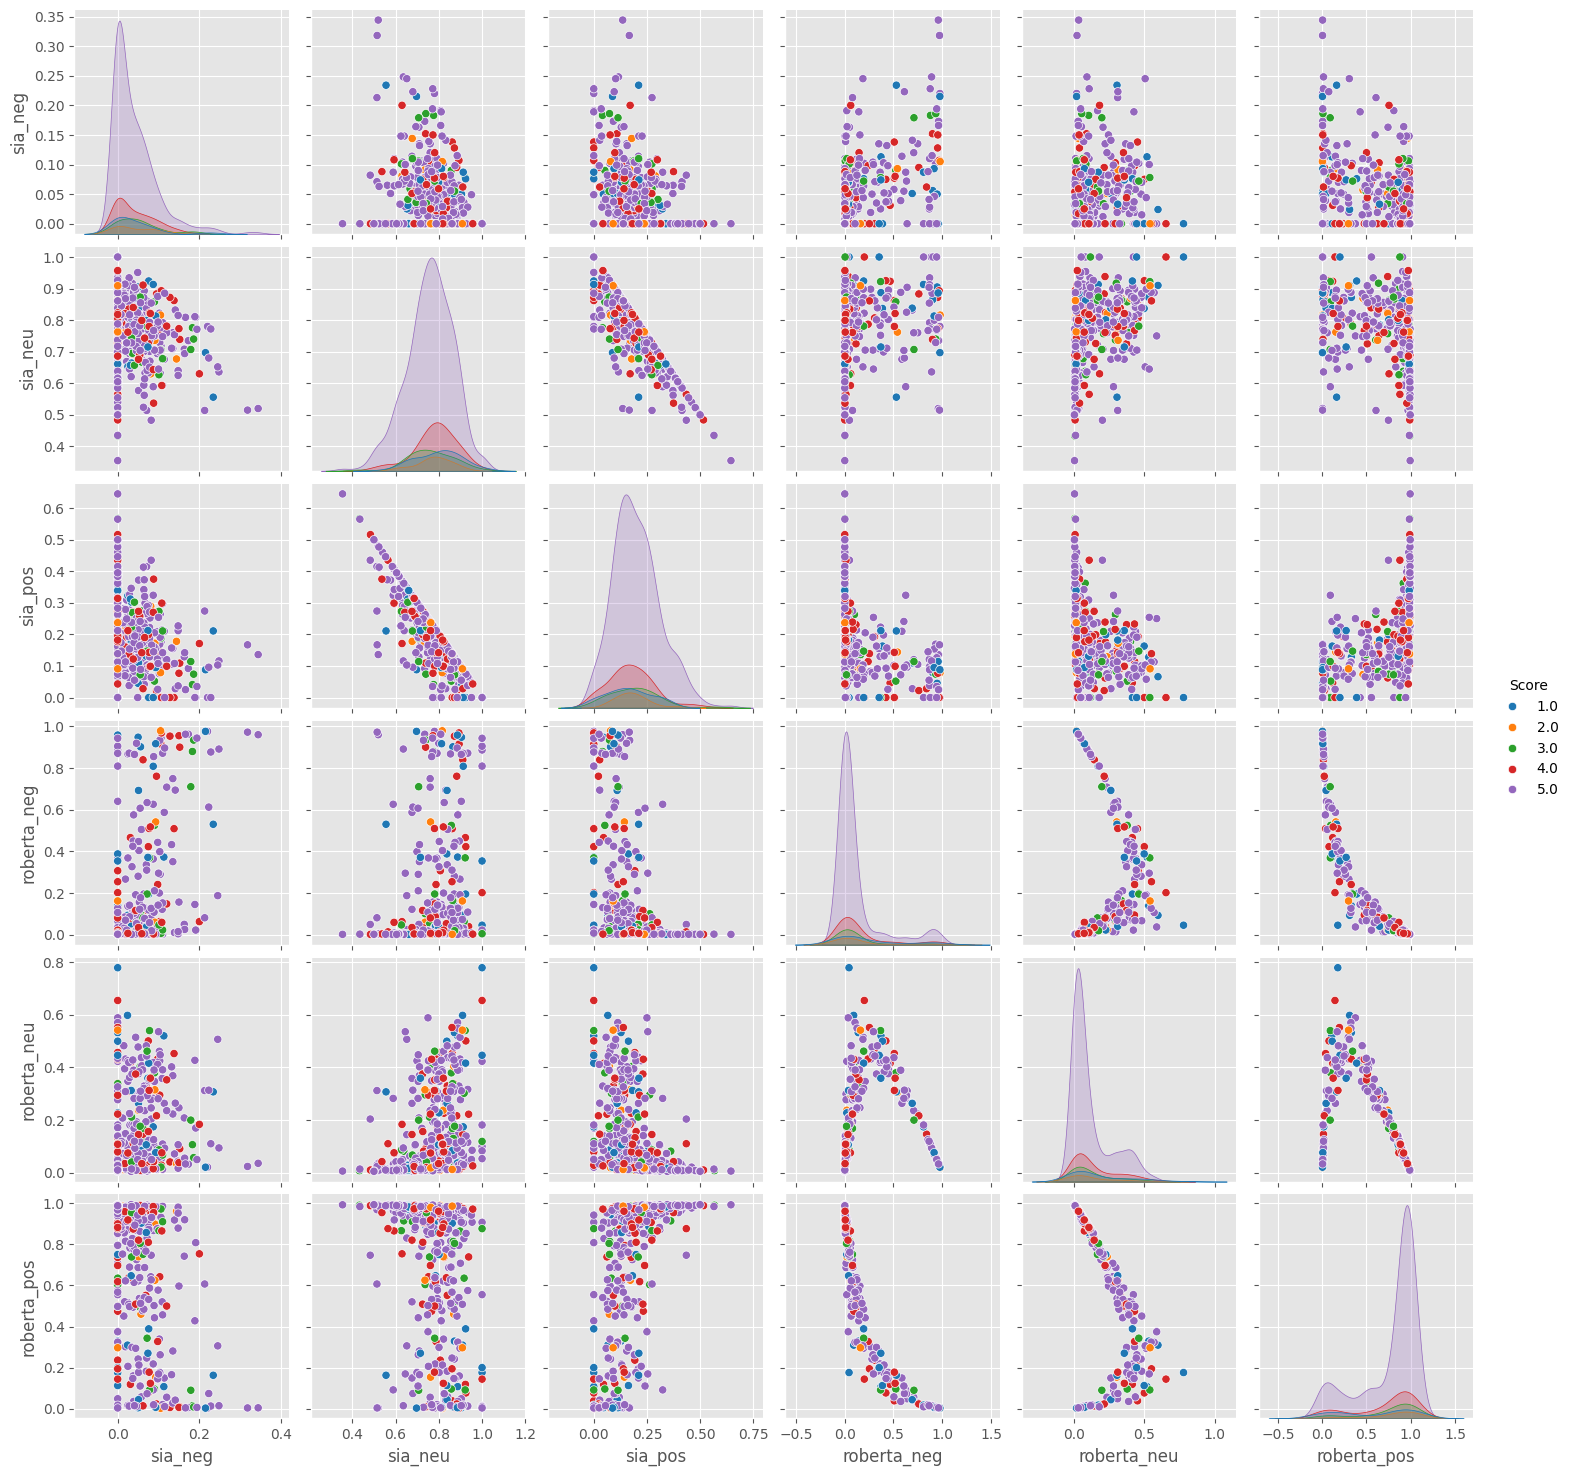

In [138]:
sns .pairplot(data=res_df,
        vars =['sia_neg', 'sia_neu', 'sia_pos', 
                'roberta_neg', 'roberta_neu', 'roberta_pos'],
        hue='Score',
        palette='tab10'
)

In [139]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
config.json: 100%|██████████| 629/629 [00:00<00:00, 922kB/s]
model.safetensors: 100%|██████████| 268M/268M [00:07<00:00, 35.5MB/s] 
tokenizer_config.json: 100%|██████████| 48.0/48.0 [00:00<00:00, 94.7kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 1.80MB/s]


In [157]:
pipe_res = {}
for i, row in df.iterrows():
        try:
                text = row['Text']
                myid = row['Id']

                result_sent = sent_pipeline(text)

                value = result_sent[0]['score'] * (-1 if result_sent[0]['label'] == 'NEGATIVE' else 1)
                pipe_res[myid] = value
        except RuntimeError:
                print(f'index {myid} threw a RuntimeError, skipping over this example')
                pipe_res[myid] = None

index 83 threw a RuntimeError, skipping over this example
index 187 threw a RuntimeError, skipping over this example


In [158]:
pipe_res

{1: 0.9983851909637451,
 2: -0.9995254278182983,
 3: 0.9997652173042297,
 4: 0.9991534948348999,
 5: 0.9987082481384277,
 6: 0.9992551207542419,
 7: 0.9993639588356018,
 8: 0.9998829364776611,
 9: 0.9985174536705017,
 10: 0.9994561076164246,
 11: 0.9361903071403503,
 12: -0.9992430210113525,
 13: -0.9899449944496155,
 14: 0.9998890161514282,
 15: 0.9976365566253662,
 16: 0.9992697834968567,
 17: 0.9688603281974792,
 18: 0.9998708963394165,
 19: -0.8231347799301147,
 20: 0.9976370334625244,
 21: 0.9998146891593933,
 22: 0.9996742010116577,
 23: 0.9995959401130676,
 24: 0.9991275668144226,
 25: 0.9971465468406677,
 26: -0.9962425231933594,
 27: -0.9988172650337219,
 28: -0.5259770154953003,
 29: 0.9997897744178772,
 30: 0.9361903071403503,
 31: 0.9846732020378113,
 32: 0.9996780157089233,
 33: 0.8532596230506897,
 34: 0.9988853335380554,
 35: 0.9994702935218811,
 36: 0.999298095703125,
 37: 0.998975396156311,
 38: -0.9933993816375732,
 39: 0.9968936443328857,
 40: 0.9997797608375549,
 41

In [165]:
pipe_res_df = pd.DataFrame(data= pipe_res.values(), columns=['Pipe_Score'])                           # creates our results dataframe
pipe_res_df.insert(0, 'Id', df.index+1)                                # creates the index column to merge the dataframe
pipe_res_df = pipe_res_df.merge(df, how = 'left')              # merges the dataframe to make the results dataframe

/var/folders/1n/tpyl9_bx5rld2prfjgfsxcpm0000gr/T/ipykernel_94927/1867220779.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pipe_res_df, x="Score", y="Pipe_Score", palette=['#1ce3fe', '#00c9f8', '#00aeef', '#0092e2', '#0076cf'],)


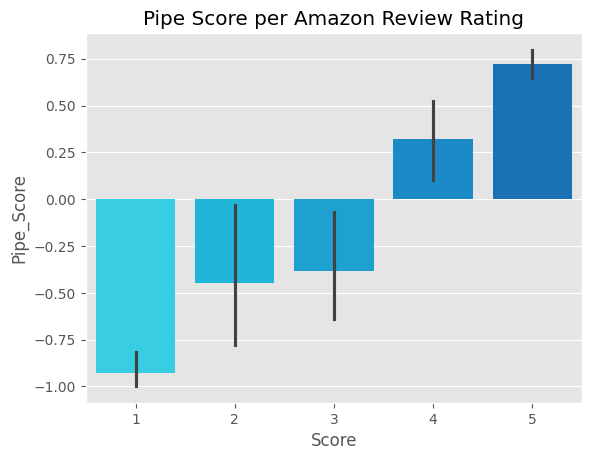

In [167]:
ax = sns.barplot(data=pipe_res_df, x="Score", y="Pipe_Score", palette=['#1ce3fe', '#00c9f8', '#00aeef', '#0092e2', '#0076cf'],)
ax.set_title("Pipe Score per Amazon Review Rating")
plt.show()

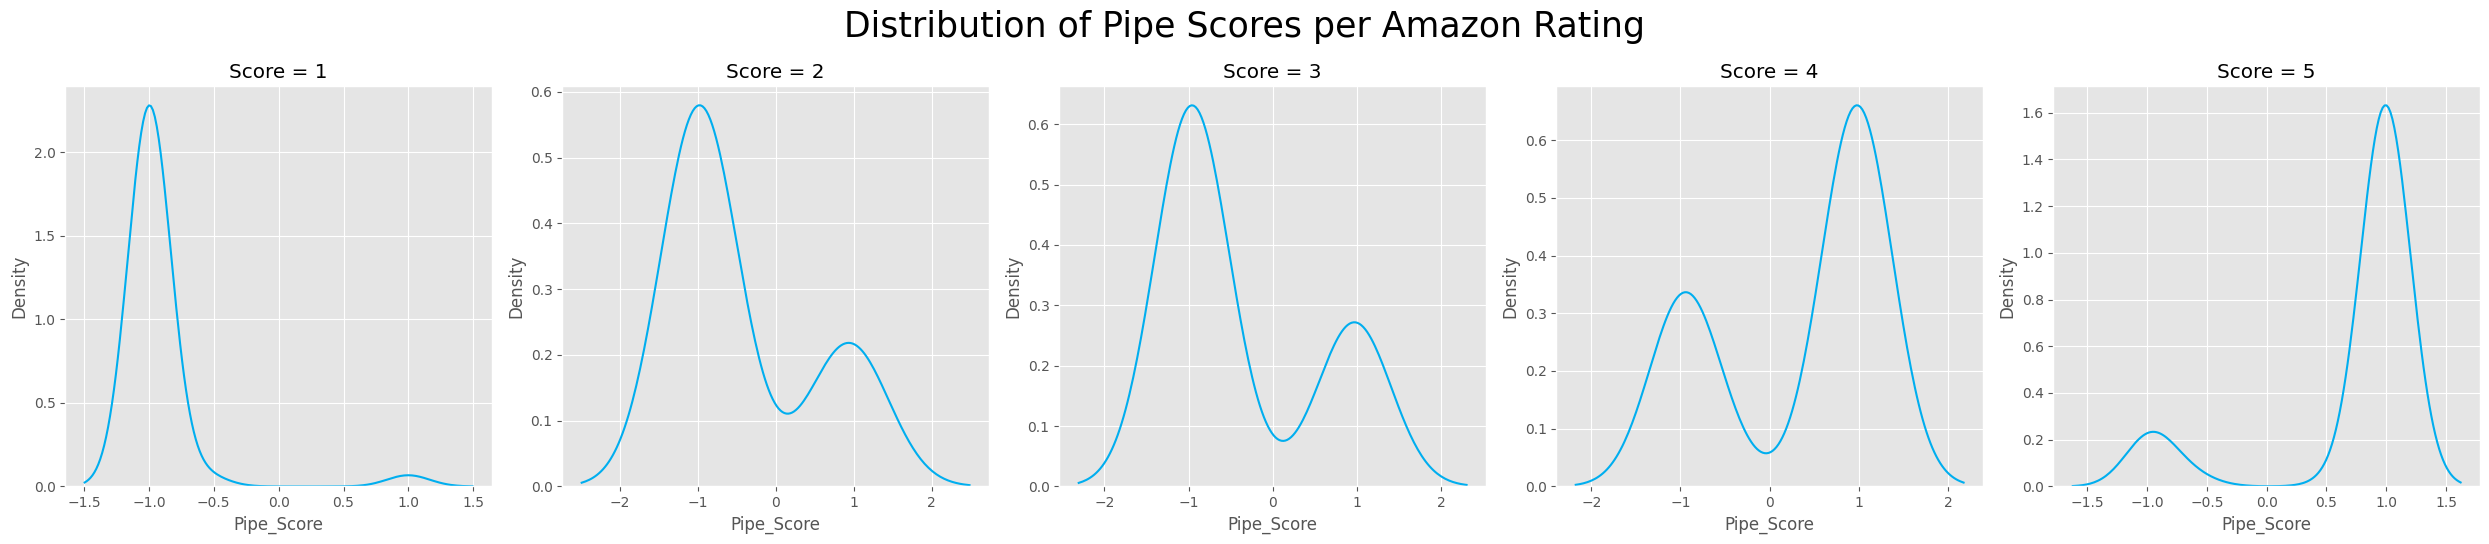

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5.5))


for score_value, ax in zip(range(1, 6), axes):
    subset_df = pipe_res_df[pipe_res_df['Score'] == score_value]
    sns.kdeplot(subset_df['Pipe_Score'], ax=ax, color = '#00aeef')
    ax.set_title(f'Score = {score_value}')

plt.suptitle('Distribution of Pipe Scores per Amazon Rating', fontsize=25)
plt.tight_layout()

plt.show()